# Creating Dog Picture Stories with LLaVA and Llama 3.1

[LLaVA](https://llava-vl.github.io/) (**L**arge **L**anguage-**a**nd-**V**ision **A**ssistant) is a powerful vision model that combines the capabilities of Large Language Models (LLMs) with image analysis. This open-source model can answer visual questions, generate captions, and perform Optical Character
Recognition (OCR), making it an ideal solution for applications that require image-based text generation. The `llava-v1.5-7b-4096`model is now available as a preview on [Groq API](https://console.groq.com/docs/vision), allowing for integration of advanced vision capabilities into applications to unlock new possibilities for image-based text generation.

In this tutorial, we'll explore the capabilities of LLaVA by analyzing a dataset of dog pictures. We'll demonstrate how to use the model to generate text descriptions of the images, and then use the `llama-3.1-70b-versatile` model powered by Groq to write short children's stories based on the images provided. By the end of this tutorial, you'll be able to use LLaVA to generate text descriptions of images and create engaging stories based on those descriptions.

### Setup

In [1]:
# Import packages
from groq import Groq
import base64
from IPython.display import Image 

This tutorial requires a Groq API key - if you don't already have one, you can create one a free GroqCloud account [here](https://console.groq.com) to generate a Groq API Key. We will be using the `llava-v1.5-7b-4096-preview` model for image descriptions and the `llama-3.1-70b-versatile` model for storytelling.

In [2]:
client = Groq()
llava_model = 'llava-v1.5-7b-4096-preview'
llama31_model = 'llama-3.1-70b-versatile'

### Basic LLaVA usage

For this tutorial, we'll use a set of dog images from [Britannica](https://www.britannica.com/animal/dog). You can find the images in the [Groq API cookbook repository](https://github.com/groq/groq-api-cookbook/tree/main/tutorials/llava-image-processing/images).

We'll be using a local image and encoding it to base64 to use with LLaVA. This is one of two ways to use an image with LLaVA - the other is to provide the actual URL of the image.

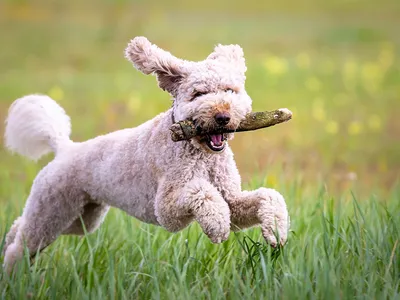

In [3]:
# Load and display image
image_path = 'images/labradoodle.png'
Image(image_path)

To use locally saved images with LLaVA, we'll need to encode them to base64 first:

In [4]:
# Define image encoding function
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(image_path)

To use LLaVA with the Groq API, we'll make a request to the `https://api.groq.com/openai/v1/chat/completions` API endpoint. However, when working with images, we need to pass the image and prompt in a slightly different format than what you might be used to. Instead of just passing a text prompt, we need to wrap it in a special JSON structure that includes the image as well. This allows LLaVA to understand that the image is part of the prompt and generate a response accordingly:

In [5]:
# Define image to text function
def image_to_text(client, model, base64_image, prompt):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                        },
                    },
                ],
            }
        ],
        model=model
    )

    return chat_completion.choices[0].message.content

prompt = "Describe this image"
image_to_text(client, llava_model, base64_image, prompt)

'The image is of a white, fluffy dog running through the grass, happily carrying an item in its mouth. The dog is focused and in motion. In addition to the main dog, there are some other smaller figures in the background. It seems to be a warm day with a clear view of the outdoor environment. The overall atmosphere of the scene conveys a playful and energetic dog engaging in activities in a field.'

### Image Storytelling with Llama 3.1

Now, let's take our image recognition to the next level by creating short stories based on the images used. Since LLaVA is great at broadly describing what's in an image, we will use LLaVA to describe the image and Llama 3.1 70B to write a short children's story based on the image description:

In [17]:
# Define short story generation function
def short_story_generation(client, image_description):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a children's book author. Write a short story about the scene depicted in this image or images.",
            },
            {
                "role": "user",
                "content": image_description,
            }
        ],
        model=llama31_model
    )
    
    return chat_completion.choices[0].message.content

prompt = '''
Describe this image in detail, including the appearance of the dog(s) and any notable actions or behaviors.
'''
image_description = image_to_text(client, llava_model, base64_image, prompt)

print(short_story_generation(client, image_description))

**Buddy's Backyard Adventure**

It was a sunny Saturday morning in the small town of Willow Creek. Eight-year-old Emma sat on the porch, watching her energetic white terrier, Buddy, play in the backyard. The air was filled with the sweet scent of blooming flowers and the sound of birds chirping in the trees.

Buddy loved playing outside, and today was no exception. In his mouth, he proudly carried a worn-out tennis ball, his favorite toy. With a burst of energy, he suddenly leaped into the air, twirling his body in a joyful spin. The tennis ball wobbled precariously in his jaws, but Buddy held tight.

As Buddy landed gently on the lush green grass, he noticed a stick lying nearby. His eyes sparkled with excitement, and he quickly dropped the tennis ball, picked up the stick in his mouth, and ran towards Emma, his tail wagging furiously.

Emma laughed and clapped her hands. "Good boy, Buddy! You're the best retriever ever!" Buddy proudly pranced around the porch, his head held high, the

Now, let's generate descriptions for multiple images and create a story with both of them. Note that this will have to be done using multiple LLaVA calls as the preview does not currently support multi-image uploads:

In [26]:
base64_image1 = encode_image('images/husky.png')
base64_image2 = encode_image('images/bulldog.png')

image_description1 = image_to_text(client, llava_model, base64_image1, prompt)
image_description2 = image_to_text(client, llava_model, base64_image2, prompt)

combined_image_description = image_description1 + '\n\n' + image_description2

print(short_story_generation(client, combined_image_description))

**The Adventures of Luna and Winston**

In a sunny meadow, two canine friends lived exciting lives filled with adventure and friendship. Luna, a majestic gray and white Husky, loved climbing rocks and surveying her surroundings. She felt regal and in charge when perched on a boulder, just like the king of the mountain.

One day, while exploring the rolling hills, Luna came across her dear friend Winston. Winston was a charming brown and white bulldog with a heart of gold and a playful spirit to match. He loved making new friends and going on exciting escapades.

Luna, proudly standing on her rocky throne, gazed down at Winston, who was enthusiastically barking at her. She couldn't help but laugh at her friend's antics. Winston, with his wrinkly face and twinkling eyes, was always up to something fun.

"Luna, come down!" Winston yelped, his barks echoing across the meadow. "Let's go on an adventure! I smell something exciting!"

Luna hesitated for a moment, enjoying the view from her lo

### Conclusion

In this tutorial, we've explored the capabilities of LLaVA and Llama 3.1 powered by Groq for lightning-fast inference speed in generating text descriptions of images and creating short stories based on those descriptions. We've seen how to use LLaVA to describe images in detail, and how to use Llama 3.1 to write engaging stories based on those descriptions. By combining these two models hosted on GroqCloud, we can create a powerful tool for generating text-based content from images. Give it a try today!